### 두 변수 간의 관계 시각화

* 범주형 변수 간의 관계 시각화 : 모자익플롯 (Mosaic Plot)
* 수치형 변수 간의 관계 시각화 : 산점도 (Scatter Plot)

In [2]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)

In [4]:
df = pd.read_csv('C:/TIL/Python_data/data/ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


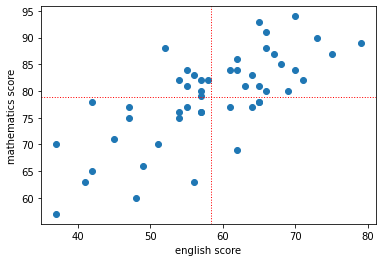

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df['english'], df['mathematics'])
plt.xlabel('english score')
plt.ylabel('mathematics score')

plt.axhline(y=df['mathematics'].mean(), color='r',
            linewidth=1,linestyle=':')
plt.axvline(x=df['english'].mean(), color='r',
            linewidth=1,linestyle=':')
plt.show()

### 공분산 (covariance)

* 두 변수 사이의 관계성 척도

In [7]:
# 각 과목의 편차 및 과목 간 공분산

summary_df = df.copy()
summary_df['eng_dev.'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['math_dev.'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['productOfDev.'] =\
    summary_df['eng_dev.'] * summary_df['math_dev.']
summary_df.head()

,english,mathematics,eng_dev.,math_dev.,productOfDev.
student number,,,,,
1,42,65,-16.38,-13.88,227.354
2,69,80,10.62,1.12,11.894
3,56,63,-2.38,-15.88,37.794
4,41,63,-17.38,-15.88,275.994
5,57,76,-1.38,-2.88,3.974


In [9]:
summary_df['productOfDev.'].mean()
# 각 학생별 영어와 수학의 공분산 평균이 58.49 이므로
# 영어와 수학은 양의 상관관계에 있다

58.486

#### numpy의 공분산 함수 : cov(data1, data2, ddof=)

In [12]:
cov_mat = np.cov(df['english'], df['mathematics'], ddof=0)  # 모집단의 공분산
cov_mat

array([[94.116, 58.486],
       [58.486, 69.386]])

In [13]:
cov_mat[0, 1], cov_mat[1, 0]

(58.4856, 58.4856)

#### 각 과목의 분산

In [14]:
cov_mat[0, 0] # 영어 과목의 분산

94.11560000000001

In [15]:
cov_mat[1, 1] # 수학 과목의 분산

69.38559999999995

In [19]:
np.var(df['english'], ddof=0), np.var(df['mathematics'], ddof=0)

(94.116, 69.386)

### 상관계수

In [20]:
# 수식으로 상관계수 계산

np.cov(df['english'], df['mathematics'], ddof=0)[0, 1] /\
    (np.std(df['english']) * np.std(df['mathematics']))

0.7237414863069244

In [21]:
# 상관계수 함수 (np.corrcoef(x, y) / df.corr())

np.corrcoef(df['english'], df['mathematics'])

array([[1.   , 0.724],
       [0.724, 1.   ]])

In [22]:
# pandas.DataFrame.corr() 함수
df.corr()

,english,mathematics
english,1.000,0.724
mathematics,0.724,1.000


## 2차원 데이터의 시각화

### 산점도

In [23]:
import matplotlib.pyplot as plt

%matplotlib inline

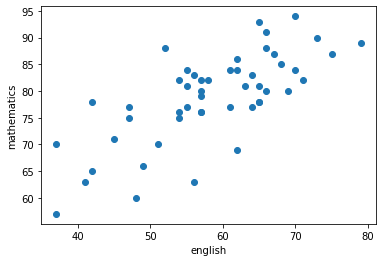

In [24]:
# 산점도
plt.scatter(df['english'],df['mathematics'] )
plt.xlabel('english')
plt.ylabel('mathematics')
plt.show()

### 회귀직선

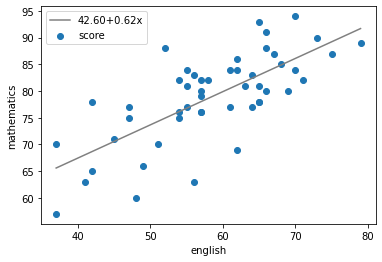

In [25]:
# 계수β_0와β_1를 구한다(기울기와 절편)
poly_fit = np.polyfit(df['english'],df['mathematics'], 1)

# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위한 x좌표
xs = np.linspace(df['english'].min(), df['english'].max())

# xs에 대응하는 y좌표
ys = poly_1d(xs)

plt.xlabel('english')
plt.ylabel('mathematics')
plt.scatter(df['english'],df['mathematics'], label='score')
plt.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

# 범례의 표시
plt.legend(loc='upper left')

plt.show()

### 히트맵

* 히스토그램의 2차원 버전으로 색을 이용해 표현하는 그래프
* 영어 점수 35점부터 80점, 수학 점수 55점부터 95점까지 5점 간격

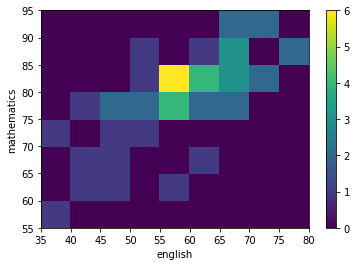

In [31]:
c = plt.hist2d(df['english'], df['mathematics'],
          bins = (9, 8), range = [(35, 80), (55, 95)])
plt.xlabel('english')
plt.ylabel('mathematics')
plt.xticks(c[1])
plt.yticks(c[2])

# 컬러바 표시
plt.colorbar(c[3])
plt.show()